# 08wk-2: numpy와 torch의 차이

최규빈  
2024-10-31

<a href="https://colab.research.google.com/github/guebin/MP2024/blob/main/posts/08wk-2.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" style="text-align: left"></a>

# 1. 강의영상

<https://youtu.be/playlist?list=PLQqh36zP38-xfu3icMrfgh5dp8tlMP4rH&si=1xc9zRPDdoEpi06h>

# 2. Imports

In [2]:
#!pip install git+https://github.com/guebin/mp2024pkg.git

In [1]:
import numpy as np
import torch
import mp2024pkg
import transformers
import datasets
import matplotlib.pyplot as plt

/home/cgb3/anaconda3/envs/hf/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.
0it [00:00, ?it/s]

# 3. `numpy`와 `torch`의 비교

`-` 파이썬입문수준의 질문: numpy랑 list의 차이가 뭔가..?

`-` 기계학습활용수준의 질문: numpy랑 torch의 차이가 뭔가..?

## A. 공통점

`-` 기본마인드: numpy에서 가능한건 torch에서도 가능하다고 생각하면 된다.

`-` 벡터선언 후 브로드캐스팅

In [3]:
np.array([1,2,3]) + 1

In [4]:
torch.tensor([1,2,3]) + 1

`-` 형태변환

*torch.tensor의 형태변환*

In [8]:
tsr1 = torch.tensor([1,2,3])
print(
    f"텐서값 = {tsr1}\n"
    f"shape = {tsr1.shape}"
)

텐서값 = tensor([1, 2, 3])
shape = torch.Size([3])

In [11]:
tsr2 = tsr1.reshape(3,1)
print(
    f"텐서값 = {tsr2}\n"
    f"shape = {tsr2.shape}"
)

텐서값 = tensor([[1],
        [2],
        [3]])
shape = torch.Size([3, 1])

In [ ]:
tsr3 = tsr1.reshape(1,3)
print(
    f"텐서값 = {tsr3}\n"
    f"shape = {tsr3.shape}"
)
ensor([1, 2, 3])

텐서값 = tensor([[1, 2, 3]])
shape = torch.Size([1, 3])

*`np.array`의 형태변환*

In [16]:
np.array([1,2,3]).reshape(1,3)

In [17]:
np.array([1,2,3]).reshape(3,1)

`-` 기타함수들도 비슷하게 운용됨

*`torch.tensor`에서의 stack*

In [18]:
tsr1 = torch.tensor([1,2,3])
tsr2 = torch.tensor([2,3,4])

In [20]:
torch.stack([tsr1,tsr2],axis=0)

In [21]:
torch.stack([tsr1,tsr2],axis=1)

*`np.array`에서의 stack*

In [22]:
arr1 = np.array([1,2,3])
arr2 = np.array([2,3,4])

In [23]:
np.stack([arr1,arr2],axis=0)

In [24]:
np.stack([arr1,arr2],axis=1)

## B. 차이점1 – 기본자료형

`-` `1/3`와 같은 숫자를 저장할때 넘파이의 경우 기본 data type은
float64임.

In [26]:
a = np.array(1/3)
a, a.dtype

In [28]:
print(
    f"값: {a}\n"
    f"dtype: {a.dtype}"
)

값: 0.3333333333333333
dtype: float64

`-` 그런데 텐서는 기본 data type이 float32임. (그래서 정확하게 저장되지
않음)

In [29]:
a = torch.tensor(1/3)
a, a.dtype

In [30]:
print(
    f"값: {a}\n"
    f"dtype: {a.dtype}"
)

값: 0.3333333432674408
dtype: torch.float32

`-` 억지로 저장할 수는 있음 (그런데 이럴 경우 `dtype` 꼬리표가 붙음)

In [35]:
a = torch.tensor(1/3,dtype=torch.float64)
a, a.dtype

In [36]:
print(
    f"값: {a}\n"
    f"dtype: {a.dtype}"
)

값: 0.3333333333333333
dtype: torch.float64

`-` 자료형 변환시 이러한 기분나쁜 꼬리표가 붙을 수 있음

`# 예시1`

In [39]:
a = np.array(1/3)
a

In [40]:
torch.tensor(a)

`#`

`# 예시2`

In [41]:
a = torch.tensor(1/3)
a

In [42]:
np.array(a)

`#`

`-` torch의 경우 float64로 저장되면 모델이 안돌아갈 수 있으니 (메모리를
많이 차지해서) 반드시 dtype을 float32로 바꾸는 습관을 가지면 좋음

In [47]:
a = np.array(1/3)
tsr = torch.tensor(a)
tsr

In [49]:
tsr.float() # 바꾸는방법1

In [51]:
tsr.to(torch.float32) # 바꾸는방법2

`-` numpy는 할줄알죠?

In [52]:
arr = np.array(1/3,dtype=np.float32)
arr

In [53]:
arr.astype(np.float64)

`-` torch에서 data type을 바꿔주는 메소드는 상당히 유용합니다. (아까
말했듯이 형식을 잘 못 맞추면 코드가 안돌아가요)

In [59]:
a = torch.tensor([1,0,1])
a, a.float()

In [60]:
a = torch.tensor([1,0,1])
a, a.bool()

In [75]:
a = torch.tensor([1.0,0,1])
a, a.long()

`-` torch에서 data type 이 중요한이유?

-   의미상 맞는 코드인데, `dtype`이 안맞으면 실행이 안될 수 있다.

## C. 차이점2 – 메소드차이

`-` `torch` 와 `numpy`의 메소드(=자료에 내장된 특수함수)들이 완전히
같지는 않음.

In [81]:
tsr = torch.tensor([1,2,3])
tsr

In [82]:
tsr.numpy() # np.array로 바꿔주는 메소드

In [84]:
tsr.float() # 자료형을 float으로 바꿔주는 메소드

In [85]:
arr = np.array([1,2,3])
arr

In [86]:
arr.numpy()

In [87]:
arr.float()

## D. 차이점3 – 미분연산지원 ($\star$)

`# 예제1` – 파이썬을 기본문법을 이용한 미분

In [88]:
def f(x):
    return x**2

In [101]:
a = 2
h = 0.001 
(f(a+h)-f(a))/h 

`#`

`# 예제2` – `torch`를 이용한 미분

In [102]:
def f(x):
    return x**2
a = torch.tensor(2.0, requires_grad=True)
b = f(a)
b.backward()
a.grad

`#`

`# 예제3`

In [108]:
a = torch.tensor(3.0, requires_grad=True)
a # 토치텐서... 그런데 이제 미분꼬리표를 곁들인..

In [111]:
print(a.grad) # a에서의 기울기

None

In [114]:
b = f(a) # b=a**2 
b # 여기에도 꼬리표같은게 붙어있음..

In [121]:
c = 2*b # c = 2*a**2
c # 여기에도 꼬리표같은게 붙어있음.. 

In [ ]:
c.backward() # c=2b=2a**2 를 미분하세요... 뭐로??? 미분꼬리표의 근원인 a로!

In [128]:
a,a.grad # a값과 a에서의 기울기 

-   $b=f(a)=a^2$
-   $c=2b=2f(a)=2a^2$
-   $c$를 $a$로 미분하면 $4a$가 된다..

`#`

`# 예제4`

In [129]:
a = torch.tensor(3.0, requires_grad=True)
a

In [130]:
print(a.grad)

None

In [131]:
b = f(a)
b

In [132]:
c = 2*b

In [133]:
b.backward() # b를미분하세요.. 뭐로?? 미분꼬리표의 근원인 a로..

In [135]:
a, a.grad

-   $a=3$
-   $b=f(a)=a^2$
-   $b$를 $a$로 미분하면 $2a$ 가 된다..

`#`

`# 예제5`

In [137]:
a = torch.tensor(3.0,requires_grad=True)
a # 토치텐서.. 미분꼬리표가 곁들여진.. 

In [ ]:
b = f(a) # 미분꼬리표가 b까지 따라옴
b

In [ ]:
c = 2*b # 미분꼬리표가 c까지 따라옴
c

In [145]:
c = c.detach() # c에서 미분꼬리표를 제거 
c

In [147]:
c.backward() # c=2b=2f(a) 를 미분하세요.. 뭐로?? 꼬리표의 근원으로..? 근데 꼬리표가 없어?? --> 미분불가능

In [149]:
b.backward()

In [151]:
a,a.grad

`#`

## E. 차이점4 – `cuda` 연산지원 ($\star$)

`-` `torch`는 `cuda`을 지원해서 좋다.. (그런데 쓰는 입장에선 불편하다)

`-` `torch.tensor`를 선언하고 그 값들을 cuda로 혹은 cpu로 옮겨보자..

In [152]:
a = torch.tensor([1.0, 2.0, 3.0])
b = torch.tensor([2.0, 3.0, 4.0])
a,b

In [159]:
a.to("cuda") 

In [161]:
a # a.to("cuda") 를 실행해도 a값 자체가 변하는건 아님.. 

In [162]:
a_cuda = a.to("cuda:0")
b_cuda = b.to("cuda:0")
a_cuda,b_cuda

In [165]:
a,b,a_cuda,b_cuda

In [171]:
a_cuda.to("cpu"),b_cuda.to("cpu") # *.to("cpu") 도 *의 값자체를 변화시키지 않음. 

`-` 구분을 위해서 변수이름을 `*_cpu`, `*_cuda`와 같이정의하자.

In [172]:
a_cpu = torch.tensor([1.0, 2.0, 3.0])
b_cpu = torch.tensor([2.0, 3.0, 4.0])
a_cuda = torch.tensor([1.0, 2.0, 3.0]).to("cuda")
b_cuda = torch.tensor([2.0, 3.0, 4.0]).to("cuda")

In [173]:
a_cpu,b_cpu,a_cuda,b_cuda

`-` cuda는 cuda끼리, cpu는 cpu끼리 연산가능

In [175]:
a_cpu + b_cpu

-   cpu끼리 연산하면 연산가능하고, 결과도 cpu에…

In [178]:
a_cpu + b_cuda

In [180]:
a_cuda + b_cpu

In [181]:
a_cuda + b_cuda

-   cuda끼리 연산하면 연산가능하고, 그 결과도 cuda에 존재함.

# 3. dtype, 차원

`# 예제1` – dtype 안맞으면 **맞는 코드 같은데** 에러가 나는 경우가 많다.

In [184]:
# 올바른코드
def f(x):
    return x**2
a = torch.tensor(2.0, requires_grad=True)
b = f(a) # b=a^2 
b.backward() # b를 a로 미분하라
a.grad # a에서의 기울값 

In [185]:
# 틀린코드
def f(x):
    return x**2
a = torch.tensor(2, requires_grad=True)
b = f(a) # b=a^2 
b.backward() # b를 a로 미분하라
a.grad # a에서의 기울값 

In [ ]:
a = torch.tensor(2, requires_grad=True) # 이 부분이 실행안됨..

In [191]:
a = torch.tensor(2.0, requires_grad=True) # 이렇게 바꾸어야함.. 
# 나중에 a로 미분하기 위해서 미분꼬리표를 쓰고 싶음. 
# 그런데 미분꼬리표를 쓸려면 a의 dtype을 float으로 해야함

> 코드잘짜는 사람은 이런 형식을 잘 맞추는 듯 합니다..

`#`

`# 예제2` – IMDB자료에서의 모델을 다시 살펴보자..

*예전강의노트보고 준비*

In [193]:
imdb = datasets.load_dataset("imdb")
model_path = "distilbert/distilbert-base-uncased"
tokenizer = transformers.AutoTokenizer.from_pretrained(model_path)
model = transformers.AutoModelForSequenceClassification.from_pretrained(
    model_path, num_labels=2
)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert/distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.

*`imdb['train']['text']`의 구조파악*

In [196]:
mp2024pkg.show_list(imdb['train']['text'])

Level 1 - Type: list, Length: 25000, Content: ['I rented I AM CURIOUS-Y ... rocker) are highlights.']
     Level 2 - Type: str, Length: 1640, Content: 'I rented I AM CURIOUS-YE ... \'t have much of a plot.'
     Level 2 - Type: str, Length: 1294, Content: '"I Am Curious: Yellow" i ... ides of women\'s bodies.'
     ...
     Level 2 - Type: str, Length: 528, Content: "If only to avoid making  ... ree growing.<br /><br />"
     Level 2 - Type: str, Length: 706, Content: "This film was probably i ... s time, and place. 2/10."
     Level 2 - Type: str, Length: 1814, Content: 'Oh, brother...after hear ... t over with.<br /><br />'
     Level 2 - Type: str, Length: 4066, Content: '\'The Adventures Of Barr ... s with the unemployed...'
     Level 2 - Type: str, Length: 319, Content: 'The story centers around ... Crocker) are highlights.'

*text의 길이가 가장 짧은 observation*

In [198]:
np.array([len(l) for l in imdb['train']['text']]).argmin()

In [201]:
single_observation = imdb['train'][10925]
single_observation 

`-` 전처리

In [202]:
tokenizer(single_observation['text'])

In [204]:
mp2024pkg.show_dict(
    tokenizer(single_observation['text'])
)

Dictionary Overview:
Total keys: 2
Keys: ['input_ids', 'attention_mask']

1. Key: 'input_ids'
   - Type: list
   - Length: 13
   - Values: [101, 2023, 3185, 2003, 6659, 2021, 2009, 2038, 2070, 2204, 3896, 1012, 102]

2. Key: 'attention_mask'
   - Type: list
   - Length: 13
   - Values: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


`-` 모델인풋1 – 차원이 맞지 않음.. (모델은 배치형태 입력을 기대해요)

In [210]:
model_input = {
    'input_ids':torch.tensor([101, 2023, 3185, 2003, 6659, 2021, 2009, 2038, 2070, 2204, 3896, 1012, 102]),
    'attention_mask':torch.tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
    'labels': torch.tensor(0)
}
model(**model_input)

`-` 모델인풋2 – 이걸 기대함

In [211]:
model_input = {
    'input_ids':torch.tensor([[101, 2023, 3185, 2003, 6659, 2021, 2009, 2038, 2070, 2204, 3896, 1012, 102]]),
    'attention_mask':torch.tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]),
    'labels': torch.tensor([0])
}
model(**model_input)

`-` 모델인풋3 – 틀린듯한데 그냥 해주는듯

In [212]:
model_input = {
    'input_ids':torch.tensor([[101, 2023, 3185, 2003, 6659, 2021, 2009, 2038, 2070, 2204, 3896, 1012, 102]]),
    'attention_mask':torch.tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]),
    'labels': torch.tensor(0)
}
model(**model_input)

`-` 모델인풋4 – 라벨은 int형이어야 한다는 강제가 있었음

In [217]:
model_input = {
    'input_ids':torch.tensor([[101, 2023, 3185, 2003, 6659, 2021, 2009, 2038, 2070, 2204, 3896, 1012, 102]]),
    'attention_mask':torch.tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]),
    'labels': torch.tensor([0.0])
}
model(**model_input)

`-` 모델인풋5 – `input_ids`도 마찬가지로 제약이 있음

In [219]:
model_input = {
    'input_ids':torch.tensor([[101.0, 2023, 3185, 2003, 6659, 2021, 2009, 2038, 2070, 2204, 3896, 1012, 102]]),
    'attention_mask':torch.tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]),
    'labels': torch.tensor([0])
}
model(**model_input)

`-` 모델인풋6 – `attention_mask`는 제약이 없음

In [ ]:
model_input = {
    'input_ids':torch.tensor([[101, 2023, 3185, 2003, 6659, 2021, 2009, 2038, 2070, 2204, 3896, 1012, 102]]),
    'attention_mask':torch.tensor([[1, 1.0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]),
    'labels': torch.tensor([0])
}
model(**model_input)

-   `attention_mask`의 의미는 사실상 True, False임.. 추측해보건데
    `attention_mask` 값은 실제 인트자체를 쓰는게 아니고 내부적으로
    bool로 바꾸는 로짓이 있을듯

`#`

# 4. `cuda` 관리

`# 예제1`

In [ ]:
imdb = datasets.load_dataset("imdb")
model_path = "distilbert/distilbert-base-uncased"
tokenizer = transformers.AutoTokenizer.from_pretrained(model_path)
model = transformers.AutoModelForSequenceClassification.from_pretrained(
    model_path, num_labels=2
)
model_input = {
    'input_ids': torch.tensor([[101, 2023, 3185, 2003, 6659, 2021, 2009, 2038, 2070, 2204, 3896, 1012, 102]]),
    'attention_mask': torch.tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]),
    'labels': torch.tensor([0]) 
}

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert/distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.

------------------------------------------------------------------------

`-` 원래사용방식

In [231]:
model(**model_input) 

-   이것이 계산되는 이유는 `model`에 포함된 숫자들과 `model_input`에
    있는 숫자들이 둘다 cpu에 있어서..

`-` `model`에 포함된 숫자들, 즉 모델의 파라메터는 어디에?

In [242]:
next(model.parameters())

`-` 모델의 파라메터를 cuda로..

In [ ]:
model.to("cuda") 
next(model.parameters())

-   주의: `data.to("cuda")`는 `data` 자체를 변화시키지 않았음. 그런데
    `model.to("cuda")`는 `model` 자체를 변화시킴

`-` 아까 계산되던 코드가 거짓말처럼 동작하지 않음

In [245]:
model(**model_input) 

`-` 다시 모델의 파라메터를 cpu로..

In [247]:
model.to("cpu") # 모델의 파라메터를 다시 cpu로..

`-` 이제 또 계산가능함..

In [248]:
model(**model_input) 

`-` 정리해보자..

*모델cpu,데이터cpu,계산결과도cpu*

In [249]:
imdb = datasets.load_dataset("imdb")
model_path = "distilbert/distilbert-base-uncased"
tokenizer = transformers.AutoTokenizer.from_pretrained(model_path)
model = transformers.AutoModelForSequenceClassification.from_pretrained(
    model_path, num_labels=2
)
model_input = {
    'input_ids': torch.tensor([[101, 2023, 3185, 2003, 6659, 2021, 2009, 2038, 2070, 2204, 3896, 1012, 102]]),
    'attention_mask': torch.tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]),
    'labels': torch.tensor([0]) 
}
model(**model_input)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert/distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.

*모델cuda,데이터cpu*

In [250]:
imdb = datasets.load_dataset("imdb")
model_path = "distilbert/distilbert-base-uncased"
tokenizer = transformers.AutoTokenizer.from_pretrained(model_path)
model = transformers.AutoModelForSequenceClassification.from_pretrained(
    model_path, num_labels=2
).to("cuda")
model_input = {
    'input_ids': torch.tensor([[101, 2023, 3185, 2003, 6659, 2021, 2009, 2038, 2070, 2204, 3896, 1012, 102]]),
    'attention_mask': torch.tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]),
    'labels': torch.tensor([0]) 
}
model(**model_input)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert/distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.

*모델cpu,데이터cuda*

In [251]:
imdb = datasets.load_dataset("imdb")
model_path = "distilbert/distilbert-base-uncased"
tokenizer = transformers.AutoTokenizer.from_pretrained(model_path)
model = transformers.AutoModelForSequenceClassification.from_pretrained(
    model_path, num_labels=2
)
model_input = {
    'input_ids': torch.tensor([[101, 2023, 3185, 2003, 6659, 2021, 2009, 2038, 2070, 2204, 3896, 1012, 102]]).to("cuda"),
    'attention_mask': torch.tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]).to("cuda"),
    'labels': torch.tensor([0]).to("cuda") 
}
model(**model_input)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert/distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.

*모델cuda,데이터cuda,결과도cuda*

In [252]:
imdb = datasets.load_dataset("imdb")
model_path = "distilbert/distilbert-base-uncased"
tokenizer = transformers.AutoTokenizer.from_pretrained(model_path)
model = transformers.AutoModelForSequenceClassification.from_pretrained(
    model_path, num_labels=2
).to("cuda")
model_input = {
    'input_ids': torch.tensor([[101, 2023, 3185, 2003, 6659, 2021, 2009, 2038, 2070, 2204, 3896, 1012, 102]]).to("cuda"),
    'attention_mask': torch.tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]).to("cuda"),
    'labels': torch.tensor([0]).to("cuda") 
}
model(**model_input)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert/distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.

`#`

# 5. `grad` 관리

`# 예제1` – 미분꼬리표 제거하고 싶음..

`-` `a`에는 꼬리표O, `b`에는 꼬리표X, `a*b`는 `a`로 인한 꼬리표가 유지

In [255]:
a = torch.tensor(3.0,requires_grad=True)
b = torch.tensor([1.0]*10)
a*b

`-` 꼬리표가 없는 `b`는 `plt.plot`이 동작하지만 꼬리표가 있는 `a*b`는
`plt.plot`이 동작하지 않음

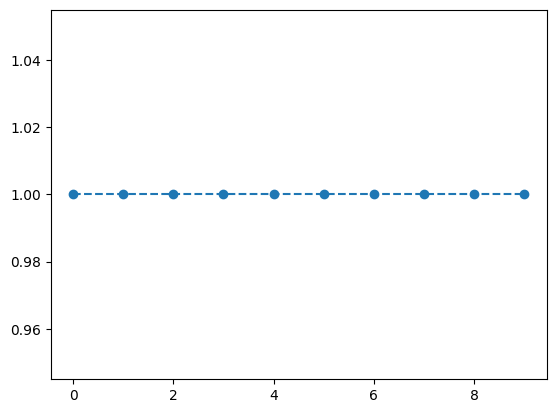

In [268]:
plt.plot(b,'--o') # 꼬리표가 없는 텐서는 그림이 잘 그려짐

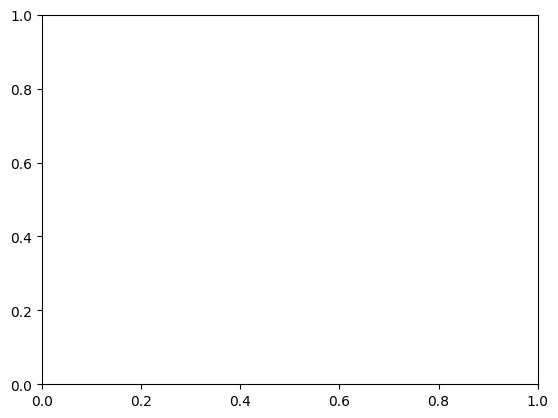

In [267]:
plt.plot(b*a,'--o') # 꼬리표가 있는 텐서는 그림을 그릴시 에러남

`-` `a`의 꼬리표를 제거하고 돌리자…

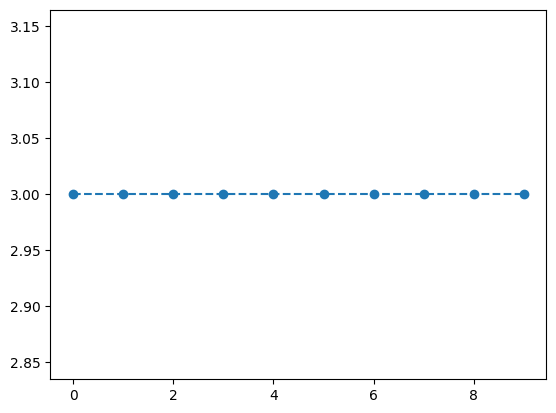

In [ ]:
plt.plot(b*a.detach(),'--o') # 이런식으로 바꾸면 그림이 그려짐

`#`

`# 예제2` – 미분꼬리표를 제거하는 또다른 기능

`-` 예제1을 아래처럼 실수로 풀었다.

In [274]:
a = torch.tensor(3.0,requires_grad=True)
b = torch.tensor([1.0]*10)

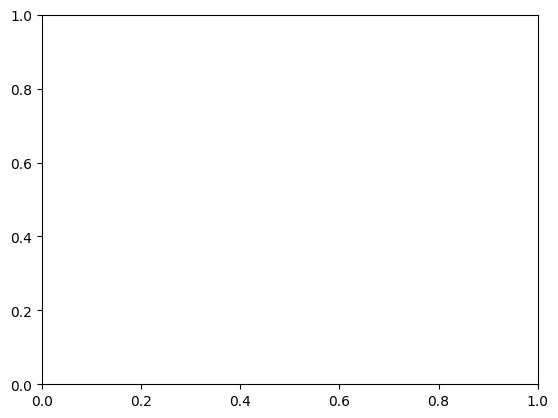

In [275]:
plt.plot(a*b.detach(),'--o')

`-` 아래와 같이 했어야 했는데, 섬세함이 부족했다..

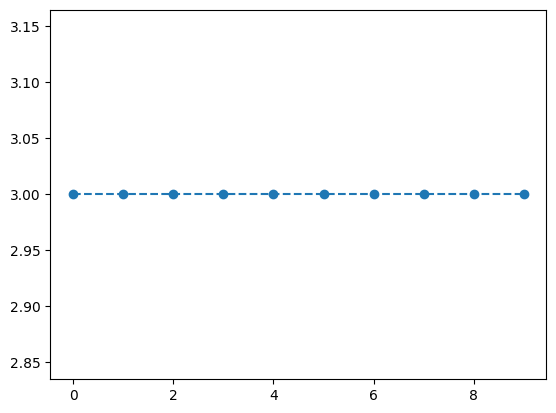

In [283]:
plt.plot((a*b).detach(),'--o')

-   앞으로 섬세하게 코딩하자??

`-` 앞으로 섬세하기 싫다면?? $\to$ `torch.set_grad_enabled()` 이용

*모드확인*

In [285]:
torch.is_grad_enabled() # 꼬리표를 계산하는 모드..

*모드변경*

In [286]:
torch.set_grad_enabled(False) 

*다시 모드확인*

In [287]:
torch.is_grad_enabled() # 꼬리표를 계산하는 모드..

*a,b상태 출력*

In [288]:
a,b

*계산*

In [289]:
a*b

*plot*

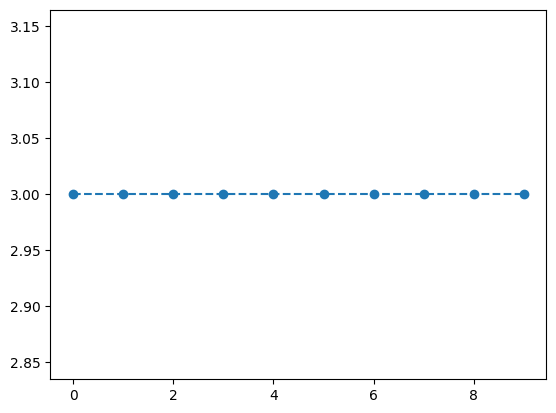

In [290]:
plt.plot(a*b,'--o')

*다시모드변경*

In [291]:
torch.set_grad_enabled(True) 

*모드변경확인*

In [292]:
torch.is_grad_enabled() # 꼬리표를 계산하는 모드..

*plot – 이제 못그림*

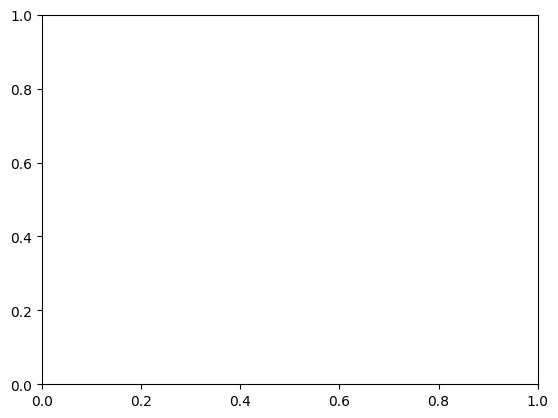

In [294]:
plt.plot(a*b)

`#`

`# 예제3`

In [295]:
model = transformers.AutoModelForSequenceClassification.from_pretrained(
    "distilbert/distilbert-base-uncased", num_labels=2
)
model_input = {
    'input_ids': torch.tensor([[101, 2023, 3185, 2003, 6659, 2021, 2009, 2038, 2070, 2204, 3896, 1012, 102]]),
    'attention_mask': torch.tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]),
    'labels': torch.tensor([0])
}
model(**model_input)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert/distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.

In [300]:
mp2024pkg.show_list(
    list(model.parameters())
)
# detach를 하나하나 적용하기에는 너무힘들듯

Level 1 - Type: list, Length: 104, Content: [Parameter containing:
te ... 0.], requires_grad=True)]
     Level 2 - Type: Parameter, Length: 30522, Content: Parameter containing:
ten ...       requires_grad=True)
     Level 2 - Type: Parameter, Length: 512, Content: Parameter containing:
ten ... 02]], requires_grad=True)
     ...
     Level 2 - Type: Parameter, Length: 768, Content: Parameter containing:
ten ... 008], requires_grad=True)
     Level 2 - Type: Parameter, Length: 768, Content: Parameter containing:
ten ... -02], requires_grad=True)
     Level 2 - Type: Parameter, Length: 768, Content: Parameter containing:
ten ...       requires_grad=True)
     Level 2 - Type: Parameter, Length: 2, Content: Parameter containing:
ten ...       requires_grad=True)
     Level 2 - Type: Parameter, Length: 2, Content: Parameter containing:
ten ...  0.], requires_grad=True)

In [301]:
torch.set_grad_enabled(False)

In [303]:
model(**model_input) # 꼬리표가 제거된 출력결과

In [306]:
torch.set_grad_enabled(True) # 다시 꼬리표를 계산하는 모드로..

In [307]:
model(**model_input) 

`#`